<a href="https://colab.research.google.com/github/jsleocadio/Signal-Digital-Processing/blob/main/DCA0118_T02_2022_2_TarefaU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

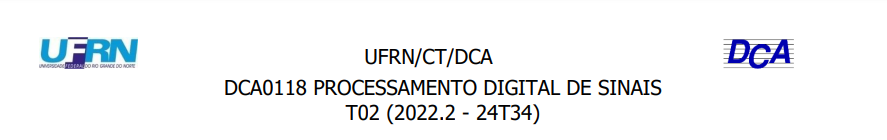

# Atividade U2

**Aluno:** Jefferson dos Santos Leocadio

***

# Questão 1 – Convolução usando FFT
Dada uma série temporal (um sinal discreto) 𝑥[𝑛] contendo o número de óbitos diários por Covid no Brasil:

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from matplotlib.axis import XTick
import matplotlib.dates

In [ ]:
filename = 'https://raw.githubusercontent.com/jsleocadio/Signal-Digital-Processing/main/Project_01/2022-09-28_Covid-Bra.csv'
df = pd.read_csv(filename)
Ind = ~np.isnan(df.new_deaths)
df = df[Ind]
df["date"] = pd.to_datetime(df["date"])

## a) Usando a operação de convolução (linear) 𝑦[𝑛] = 𝑥[𝑛] ∗ ℎ[𝑛], implemente um filtro de média móvel com uma janela temporal de N = 7 dias. Explique o efeito obtido da convolução feita anteriormente, fundamente a sua resposta pela forma do sinal (no domínio tempo).

In [ ]:
n = df.date
x = df.new_deaths

In [ ]:
N = 7
h = np.ones(N)/N
y = np.convolve(x, h)
y = y[0:len(x)]

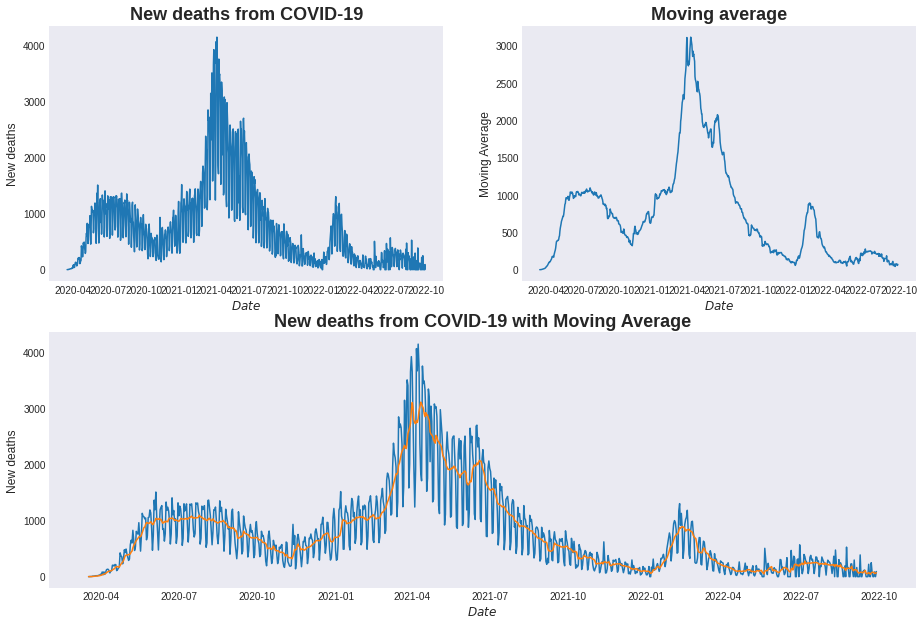

In [ ]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(24,16))

ax1 = plt.subplot2grid((3,3),(0, 1),1,1)
lin = plt.plot(n,y)
plt.xlabel('$Date$',fontdict={'fontsize':12})
plt.ylabel('Moving Average',fontdict={'fontsize':12})
plt.title('Moving average',fontdict={'fontsize':18,'fontweight':'bold'})

ax2 = plt.subplot2grid((3,3),(0, 0),1,1)
lin = plt.plot(n,x)
plt.xlabel('$Date$',fontdict={'fontsize':12})
plt.ylabel('New deaths',fontdict={'fontsize':12})
plt.title('New deaths from COVID-19',fontdict={'fontsize':18,'fontweight':'bold'})

ax3 = plt.subplot2grid((3,3),(1, 0),1,2)
lin1 = plt.plot(n,x)
lin2 = plt.plot(n,y)
plt.xlabel('$Date$',fontdict={'fontsize':12})
plt.ylabel('New deaths',fontdict={'fontsize':12})
plt.title('New deaths from COVID-19 with Moving Average',fontdict={'fontsize':18,'fontweight':'bold'})

fig.show()

***
<br>

**Considerações:** O que podemos perceber é que a saída da convolução $x[n]*h[n]$ é um sinal sem ruídos em comparação ao sinal original $x[n]$. Ao colocá-lo sobre o sinal original podemos ver um sinal suavizado.

## b) Implemente a operação a obtida em a), mas desta vez faça o cálculo da convolução usando método de fft. Explique o resultado obtido, fundamente a sua resposta no espectro dos sinais utilizados;

In [ ]:
def OneSideSpectrum(X):
  nfft  = len(X)
  X = np.abs(X)/nfft;
  Nf = nfft//2+1
  Y = X[0:Nf]
  Y[1:Nf] = 2*Y[1:Nf]
  return Y

In [ ]:
N1 = len(x)
N2 = len(h)
M = N1 + N2 - 1

# Fazemos zero padding em ambas as sequencias 
x1 = np.zeros(M)
x1[:N1] = x

h1 = np.zeros(M)
h1[:N2] = h

# Calculando as respectivas fft das sequencias com zero padding
X1 = fft(x1)
H1 = fft(h1)


X = OneSideSpectrum(X1[:N1])
H = OneSideSpectrum(H1[:N1])

Y = X1*H1
Y = OneSideSpectrum(Y[:N1])

y_fft = np.real(ifft(X1*H1))
y_fft = y_fft[:N1]

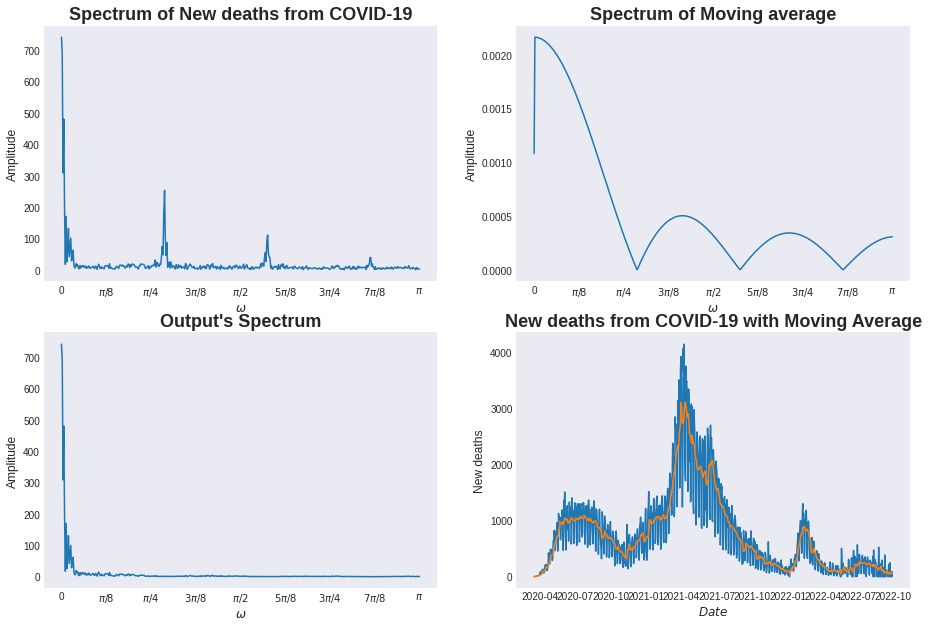

In [ ]:
freq = np.arange(0, np.pi+0.001, np.pi/(N1/2))

plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(24,16))

XTick = np.arange(0,np.pi+0.1,np.pi/8)
Lables = ['0','$\pi/8$','$\pi/4$','$3\pi/8$','$\pi/2$','$5\pi/8$','$3\pi/4$','$7\pi/8$','$\pi$'];

ax1 = plt.subplot2grid((3,3),(0, 1),1,1)
lin = plt.plot(freq,H)
plt.xticks(XTick,Lables)
plt.xlabel('$\omega$',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('Spectrum of Moving average',fontdict={'fontsize':18,'fontweight':'bold'})

ax2 = plt.subplot2grid((3,3),(0, 0),1,1)
lin = plt.plot(freq,X)
plt.xticks(XTick,Lables)
plt.xlabel('$\omega$',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('Spectrum of New deaths from COVID-19',fontdict={'fontsize':18,'fontweight':'bold'})

ax3 = plt.subplot2grid((3,3),(1, 0),1,1)
lin = plt.plot(freq,Y)
plt.xticks(XTick,Lables)
plt.xlabel('$\omega$',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('Output\'s Spectrum',fontdict={'fontsize':18,'fontweight':'bold'})

ax4 = plt.subplot2grid((3,3),(1, 1),1,1)
lin1 = plt.plot(n,x)
lin2 = plt.plot(n,y_fft)
plt.xlabel('$Date$',fontdict={'fontsize':12})
plt.ylabel('New deaths',fontdict={'fontsize':12})
plt.title('New deaths from COVID-19 with Moving Average',fontdict={'fontsize':18,'fontweight':'bold'})

fig.show()

***
<br>

**Considerações:** Comparando o gráfico da entrada com o da saída vimos que só a amplitude em frequências baixas, por isso, a média-móvel atuou como filtro passa-baixas.

## c) Compare os resultados obtidos em a) e b). Explique a possível relação entre os resultados, fundamente a sua resposta em alguma propriedade da TFD.

***
<br>

Os resultados obtidos tanto em *a)* quanto em *b)* são iguais. O que explica isto é o fato de que a *Transformada Discreta de Fourier* nada mais é que uma discretização da *Transformada de Fourier de Tempo Discreto* e a *FFT (Fast Fourier Transform)* é um algoritmo que aplica a *DFT*. 

Um cuidado que foi tomado para garantir que o resultado seja o mesmo, foi garantir que tanto $x[n]$ e $h[n]$ tenham o mesmo tamanho, apesar de estarem preenchidos com 0's. Isto faz com que haja uma equivalência entre a convolução circular e a convolução linear, que seguindo as propriedades da *DFT* temos a seguinte equivalência:

$$y[n] = x[n]\circ h[n] \equiv \mathcal{F}^{-1}\{X(e^{j\omega})H(e^{j\omega})\},$$

onde: 

$X(e^{j\omega}) = \mathcal{F}\{x[n]\}$ e,<br>
$H(e^{j\omega}) = \mathcal{F}\{h[n]\}$

<br>

***

A entrega da atividade deverá conter:

1. Um relatório com os códigos e explicações para cada uma das tarefas solicitadas anteriormente.<br>
**Recomendação:** Poderá ser feito um notebook no Google Colab.
2. Um vídeo (aproximadamente 5 min), explicando de forma breve as soluções e explicações apresentadas no relatório.

**Nota:** A atividade deverá ser realizada de forma individual. Por favor, compartilhar no Sigaa os links do relatório (notebook) e do vídeo explicativo. Não esquecer de colocar a
sua identificação no relatório.